interactive(children=(FloatSlider(value=3.556, description='Coil_Rad_mm', max=8.0, min=3.0), FloatSlider(value…

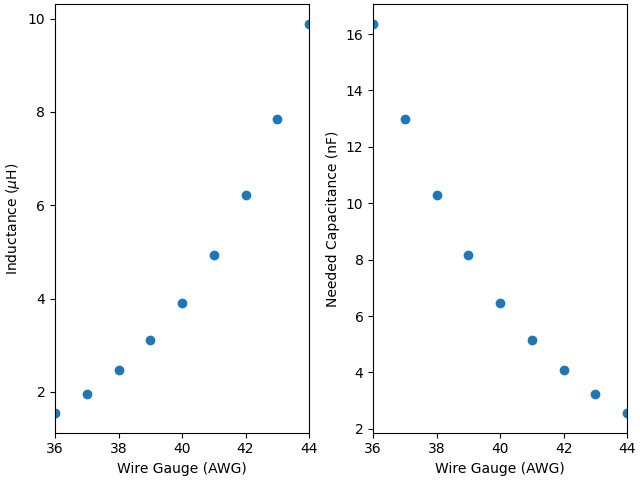

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib widget
plt.close('all')
fig = plt.figure(constrained_layout = True)
ax = fig.add_subplot(1, 2, 1)
bx = fig.add_subplot(1, 2, 2)

def awg2mm(AWG):
    """
    Convert AWG ( American Wire Gauge to mm diameter)

    :param awg: Wire AWG
    :return:    Wire milimitter diameter


    diameter [mm] = 0.127 * 92 ^ ((36-AWG)/39)

    Reference: http://www.reuk.co.uk/AWG-to-Square-mm-Wire-Size-Converter.htm
    """
    return 0.127 * 92 ** ((36 - AWG) / 39)

mu = 4*np.pi*1e-7

def update(Coil_Rad_mm = 3.556,Coil_Len_mm = 2,Res_Freq_MHz = 1,AWG_min=36,AWG_max = 44):
    awgs = np.arange(AWG_min,AWG_max+1,1)
    mms = awg2mm(awgs)
    
    ax.clear()
    bx.clear()
    ax.set_xlim(AWG_min,AWG_max)
    ax.set_xlabel('Wire Gauge (AWG)')
    ax.set_ylabel(r'Inductance ($\mu$H)')
    L = Coil_Len_mm*1e-3*mu*np.pi/4*(Coil_Rad_mm/mms)**2
    ax.scatter(awgs,1e6*L)
    # bx = ax.twinx()
    bx.set_xlim(AWG_min,AWG_max)
    bx.set_xlabel('Wire Gauge (AWG)')
    bx.set_ylabel('Needed Capacitance (nF)')
    bx.scatter(awgs,1e9/(L*(Res_Freq_MHz*1e6*2*np.pi)**2))

interact(update, Coil_Rad_mm = (3,8,.1), Coil_Len_mm = (0.1,5,.1), Res_Freq_MHz = (.1,5,.1), AWG_min=(20,40,1),WG_min=(26,50,1)); 